In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

from sklearn import decomposition

import seaborn as sns

In [3]:
#load up grad_data
grad_data = pd.read_csv('../data/Merged Data/GRADUATION_WITH_CENSUS.csv')


In [4]:
grad_data.shape

(9907, 580)

In [5]:
grad_data.isnull().sum().sort_values(ascending=False)

Flag                                9883
MAM_COHORT_1112                     6114
MAM_RATE_1112                       6114
MTR_RATE_1112                       5750
MTR_COHORT_1112                     5750
LEP_COHORT_1112                     5304
MAS_COHORT_1112                     4771
MAS_RATE_1112                       4771
MBL_COHORT_1112                     3623
MBL_RATE_1112                       3623
MHI_RATE_1112                       2674
MHI_COHORT_1112                     2674
CWD_RATE_1112                        347
CWD_COHORT_1112                      347
Mail_Return_Rate_CEN_2010            237
pct_Mailback_Count_CEN_2010          230
pct_RPLCMNT_FRMS_CEN_2010            230
pct_FRST_FRMS_CEN_2010               230
pct_TEA_Update_Leave_CEN_2010        230
pct_TEA_MailOutMailBack_CEN_2010     230
pct_Census_UAA_CEN_2010              230
pct_Deletes_CEN_2010                 230
pct_Vacant_CEN_2010                  230
pct_Census_Mail_Returns_CEN_2010     230
pct_BILQ_Mailout

In [6]:
#load election_data
election_data = pd.read_csv('../data/us-election-2016-results-by-county.csv')

In [7]:
election_data.shape

(15565, 8)

In [8]:
election_data.isnull().sum()

StateCode             0
StateName             0
CountyFips            0
CountyName            0
CountyTotalVote       0
Party                 0
Candidate             0
VoteCount          2338
dtype: int64

In [10]:
#selecting features out of the 580 original, probably can do some ML feauture selection here
grad_df = grad_data[['STNAM','FIPST','County','Percentage',
           'School.District','ALL_COHORT_1112',
           'ALL_RATE_1112','MAM_COHORT_1112','MAM_RATE_1112',
           'MAS_COHORT_1112','MAS_RATE_1112','MBL_COHORT_1112',
           'MBL_RATE_1112','MHI_COHORT_1112','MHI_RATE_1112',
           'MTR_COHORT_1112','MTR_RATE_1112','MWH_COHORT_1112',
           'MWH_RATE_1112',
           'Tot_Population_CEN_2010','Males_CEN_2010','Females_CEN_2010',
           'Hispanic_CEN_2010','NH_White_alone_CEN_2010','NH_Blk_alone_CEN_2010',
           'NH_AIAN_alone_CEN_2010','NH_Asian_alone_CEN_2010','NH_NHOPI_alone_CEN_2010','leaid11']]


In [11]:
#function for feature engineering a CountyFips column in grad_df
def fipsify(leaid11):
    record = grad_data[grad_data['leaid11'] == leaid11][['FIPST','County']].reset_index()
    #print grad_data[grad_data['leaid11'] == leaid11][['leaid11','FIPST','County']]
    #print (len(int(record.County[0])))
           
    if len(str(record.County.iloc[0])) == 3:
        return int((str(record.FIPST.iloc[0]) + str(int(record.County.iloc[0]))))
    
    elif len(str(record.County.iloc[0])) == 2:
        return int(str(record.FIPST.iloc[0]) + '0' + str(record.County.iloc[0]))
    
    else:
        return int(str(record.FIPST.iloc[0]) + '00' + str(record.County.iloc[0]))

In [12]:
grad_df['CountyFips'] = grad_df['leaid11'].apply(fipsify)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
grad_df.head()

STNAM  FIPST  County  Percentage                   School.District  \
0  ALABAMA      1      95   89.915474  Albertville City School District   
1  ALABAMA      1      95  100.000000   Marshall County School District   
2  ALABAMA      1      73   99.903457       Hoover City School District   
3  ALABAMA      1      89  100.000000      Madison City School District   
4  ALABAMA      1      73  100.000000        Leeds City School District   

   ALL_COHORT_1112  ALL_RATE_1112  MAM_COHORT_1112 MAM_RATE_1112  \
0              268           83.0              NaN           NaN   
1              424           79.0              2.0            PS   
2             1042           91.0              1.0            PS   
3              836           91.0              4.0            PS   
4              117           72.0              NaN           NaN   

   MAS_COHORT_1112   ...    Tot_Population_CEN_2010  Males_CEN_2010  \
0              NaN   ...                       5492            2702   
1              1.0   ...                       6028            3036   
2             71.0   ...                       4162            2014   
3             44.0   ...                       3912            1884   
4              NaN   ...                       2171            1038   

  Females_CEN_2010  Hispanic_CEN_2010 NH_White_alone_CEN_2010  \
0             2790               1583                    3626   
1             2992                793                    5058   
2             2148                 94                    3704   
3             2028                170                    2258   
4             1133                115                    1057   

   NH_Blk_alone_CEN_2010 NH_AIAN_alone_CEN_2010  NH_Asian_alone_CEN_2010  \
0                     99                     41                       31   
1                     41                     55                        6   
2                    129                     11                      153   
3                   1127                     26                      240   
4                    931                      7                        8   

  NH_NHOPI_alone_CEN_2010  leaid11  
0                       2   100005  
1                       1   100006  
2                       0   100007  
3                      10   100008  
4                       0   100011  

[5 rows x 29 columns]

In [14]:
#mean graduation rate for all cohorts in all school districts
grad_df.ALL_RATE_1112.mean()

83.039090444558

In [15]:
#feature engineer columns for # of votes that clinton and trump received. reduces # of columns required
hillary_ls = []
trump_ls = []
for fips in election_data.CountyFips:
    record = election_data[election_data.CountyFips == fips][['Candidate','VoteCount']].reset_index()
    #print fips
    #print election_data[election_data.CountyFips == fips][['Candidate','VoteCount']].reset_index()
    trump_ls.append(record.VoteCount[0])
    hillary_ls.append(record.VoteCount[1])

In [16]:
election_data['clinton'] = hillary_ls
election_data['trump'] = trump_ls
election_data.head()

StateCode StateName  CountyFips CountyName  CountyTotalVote Party Candidate  \
0        AK    alaska        2000     Alaska           246588   GOP     Trump   
1        AL   alabama        1087      Macon             8748   GOP     Trump   
2        AL   alabama        1131     Wilcox             6095   GOP     Trump   
3        AL   alabama        1037      Coosa             5223   GOP     Trump   
4        AL   alabama        1009     Blount            25384   GOP     Trump   

   VoteCount  clinton     trump  
0   130415.0  93007.0  130415.0  
1     1394.0   7237.0    1394.0  
2     1737.0   4329.0    1737.0  
3     3376.0   1780.0    3376.0  
4    22808.0   2150.0   22808.0

In [17]:
#drop excess columns for other candidates

election_data = election_data[['StateCode','StateName','CountyFips','CountyName','CountyTotalVote','clinton','trump']].groupby(['CountyFips','StateCode','StateName','CountyName','CountyTotalVote']).mean()

In [18]:
election_data = election_data.reset_index()


In [19]:
#merging grad_df and election_data on CountyFips
grad_df = grad_df.merge(election_data)

In [174]:
grad_df.isnull().sum()

STNAM                         0
FIPST                         0
County                        0
Percentage                    0
School.District               0
ALL_COHORT_1112               0
ALL_RATE_1112               114
MAM_COHORT_1112            6113
MAM_RATE_1112              6113
MAS_COHORT_1112            4744
MAS_RATE_1112              4744
MBL_COHORT_1112            3587
MBL_RATE_1112              3587
MHI_COHORT_1112            2644
MHI_RATE_1112              2644
MTR_COHORT_1112            5723
MTR_RATE_1112              5723
MWH_COHORT_1112             116
MWH_RATE_1112               116
Tot_Population_CEN_2010       0
Males_CEN_2010                0
Females_CEN_2010              0
Hispanic_CEN_2010             0
NH_White_alone_CEN_2010       0
NH_Blk_alone_CEN_2010         0
NH_AIAN_alone_CEN_2010        0
NH_Asian_alone_CEN_2010       0
NH_NHOPI_alone_CEN_2010       0
leaid11                       0
CountyFips                    0
StateCode                     0
StateNam

In [21]:
#fill null values with 0

df = grad_df[['StateCode','STNAM','County','CountyFips','Percentage',
           'School.District','ALL_COHORT_1112','ALL_RATE_1112',
           'MAS_COHORT_1112','MAS_RATE_1112','MBL_COHORT_1112',
           'MBL_RATE_1112','MHI_COHORT_1112','MHI_RATE_1112',
           'MWH_COHORT_1112',
           'MWH_RATE_1112',
           'Tot_Population_CEN_2010','Males_CEN_2010','Females_CEN_2010',
           'Hispanic_CEN_2010','NH_White_alone_CEN_2010','NH_Blk_alone_CEN_2010',
           'NH_AIAN_alone_CEN_2010','NH_Asian_alone_CEN_2010','leaid11','clinton','trump','CountyTotalVote']].fillna(0)

In [22]:
#rename columns appropriately
df = df.rename(columns={'StateCode':"st",'STNAM':'state','County':'county',
           'School.District':'school_district','ALL_COHORT_1112':'all_cohort','ALL_RATE_1112':'all_rate',
           'MAS_COHORT_1112':'asian_cohort','MBL_COHORT_1112':'black_cohort',
           'MHI_COHORT_1112':'hispanic_cohort',
           'MWH_COHORT_1112':'white_cohort',
           'Tot_Population_CEN_2010':'tot_pop','Males_CEN_2010':'male_pop','Females_CEN_2010':'female_pop',
           'Hispanic_CEN_2010':'hispanic_pop','NH_White_alone_CEN_2010':'white_pop','NH_Blk_alone_CEN_2010':'black_pop',
           'NH_AIAN_alone_CEN_2010':'native_pop','NH_Asian_alone_CEN_2010':'asian_pop',
           'CountyTotalVote':'tot_vote'})

In [23]:
df.columns

Index([u'st', u'state', u'county', u'CountyFips', u'Percentage',
       u'school_district', u'all_cohort', u'all_rate', u'asian_cohort',
       u'MAS_RATE_1112', u'black_cohort', u'MBL_RATE_1112', u'hispanic_cohort',
       u'MHI_RATE_1112', u'white_cohort', u'MWH_RATE_1112', u'tot_pop',
       u'male_pop', u'female_pop', u'hispanic_pop', u'white_pop', u'black_pop',
       u'native_pop', u'asian_pop', u'leaid11', u'clinton', u'trump',
       u'tot_vote'],
      dtype='object')

In [173]:
df.shape

(9856, 36)

In [25]:
#cleans graduation rates
def clean_rate(rate): 
    #print rate
    #returns rate if rate is just integer

    if (len(str(rate)) < 3) and (str(rate) != 'PS'):
        return float(rate)


    #returns median of graduation rate if rate is a range. ie. 75-79 returns 77
    if len(str(rate)) == 5:
        return (float(int(rate[:2])) + float(int(rate[3:]))) / 2

    #returns integer if special chars are in front. ie. GE50 returns 50
    elif len(str(rate)) == 4:
        #print rate
        #print float(rate[2:])
        return float(rate[2:])

    #returns string PS, to be used to replace with all_rate
    else:
        return 'PS'

In [26]:
#apply the rate cleaner to all cohort rates
df['asian_rate'] = df.MAS_RATE_1112.apply(clean_rate)
df['white_rate'] = df.MWH_RATE_1112.apply(clean_rate)
df['black_rate'] = df.MBL_RATE_1112.apply(clean_rate)
df['hispanic_rate'] = df.MHI_RATE_1112.apply(clean_rate)

In [27]:
#replaces 'PS' values for all_rates value. 'PS' was used for very small cohort sizes

asian_rate = []
black_rate = []
hispanic_rate = []
white_rate = []



for leaid11 in df.leaid11:
    record = df[df.leaid11 == leaid11].reset_index()
    if record.asian_rate.iloc[0] == 'PS':
        asian_rate.append(record.all_rate.iloc[0])
    else:
        asian_rate.append(record.asian_rate.iloc[0])
        
    if record.black_rate.iloc[0] == 'PS':
        black_rate.append(record.all_rate.iloc[0])
    else:
        black_rate.append(record.black_rate.iloc[0])
        
    if record.hispanic_rate.iloc[0] == 'PS':
        hispanic_rate.append(record.all_rate.iloc[0])
    else:
        hispanic_rate.append(record.hispanic_rate.iloc[0])
        
    if record.white_rate.iloc[0] == 'PS':
        white_rate.append(record.all_rate.iloc[0])
    else:
        white_rate.append(record.white_rate.iloc[0])
        
        
    

In [28]:
#changes the rates to new set that corrects the 'PS' values

df.asian_rate = asian_rate
df.black_rate = black_rate
df.hispanic_rate = hispanic_rate
df.white_rate = white_rate

In [30]:
#look at mean rates for all students
#zero % graduation rates for cohorts where a particular race is not represented is pulling down the mean
#ex. when a class has 0 asian students within the cohort, the graduation rate for asian students is 0%
print 'all_rate:', df.all_rate.mean()
print 'asian_rate', df.asian_rate.mean()
print 'black_rate', df.black_rate.mean()
print 'white_rate', df.white_rate.mean()
print 'hispanic_rate', df.hispanic_rate.mean()

all_rate: 82.1708096591
asian_rate 40.879007711
black_rate 48.225294237
white_rate 81.2064224838
hispanic_rate 54.2704951299


In [12]:
df[['st','MAS_RATE_1112','asian_cohort','asian_rate','all_rate','leaid11','CountyFips']].head()

NameError: name 'df' is not defined

In [32]:
#feature engineering columns for how many students of each cohort are expected to graduate

df.head()

asian_grad_cohort = []
black_grad_cohort = []
hispanic_grad_cohort = []
white_grad_cohort = []

for leaid11 in df.leaid11:
    record = df[df.leaid11 == leaid11].reset_index()
    
    asian_grad_cohort.append(round(record.asian_cohort.iloc[0]*(record.asian_rate.iloc[0]/100)))
    black_grad_cohort.append(round(record.black_cohort.iloc[0]*(record.black_rate.iloc[0]/100)))
    hispanic_grad_cohort.append(round(record.hispanic_cohort.iloc[0]*(record.hispanic_rate.iloc[0]/100)))
    white_grad_cohort.append(round(record.white_cohort.iloc[0]*(record.white_rate.iloc[0]/100)))
    

In [33]:
df['asian_grad_cohort'] = asian_grad_cohort
df['black_grad_cohort'] = black_grad_cohort
df['hispanic_grad_cohort'] = hispanic_grad_cohort
df['white_grad_cohort'] = white_grad_cohort

In [34]:
#consolidating df by school district into df by county
#values that need to be summed are in this df
df1 = df[[u'st', u'state', u'CountyFips',
       u'all_cohort',
       u'asian_cohort', u'black_cohort',
       u'hispanic_cohort',
       u'white_cohort', 'asian_grad_cohort', 'black_grad_cohort', 'hispanic_grad_cohort', 'white_grad_cohort',
       u'tot_pop', u'male_pop', u'female_pop',
       u'hispanic_pop', u'white_pop', u'black_pop', u'native_pop',
       u'asian_pop']].groupby([ u'CountyFips', u'st', u'state']).sum().reset_index()

In [35]:
#values that need to be averaged are in this 
df2 = df[[u'st', u'state', u'CountyFips', 
    u'school_district',
    u'asian_rate', u'black_rate',
    u'hispanic_rate',
    u'white_rate',u'all_rate',
    u'clinton', u'trump','tot_vote']].groupby([ u'CountyFips', u'st', u'state']).mean().reset_index()

In [37]:
#merge those dfs together to get data by countyfips
df1 = df1.merge(df2)

In [38]:
df1.columns

Index([          u'CountyFips',                   u'st',
                      u'state',           u'all_cohort',
               u'asian_cohort',         u'black_cohort',
            u'hispanic_cohort',         u'white_cohort',
          u'asian_grad_cohort',    u'black_grad_cohort',
       u'hispanic_grad_cohort',    u'white_grad_cohort',
                    u'tot_pop',             u'male_pop',
                 u'female_pop',         u'hispanic_pop',
                  u'white_pop',            u'black_pop',
                 u'native_pop',            u'asian_pop',
                 u'asian_rate',           u'black_rate',
              u'hispanic_rate',           u'white_rate',
                   u'all_rate',              u'clinton',
                      u'trump',             u'tot_vote'],
      dtype='object')

In [39]:
#feature engineer tags for the data for who the county voted for
def elect_tag(fips):
    record = df1[df1.CountyFips == fips].reset_index()
    if record.clinton[0] > record.trump[0]:
        return 'clinton'
    else:
        return 'trump'

In [40]:
#feature engineer tags for the data for who the county voted for but binary
def elect_tag_1(fips):
    record = df1[df1.CountyFips == fips].reset_index()
    if record.clinton[0] > record.trump[0]:
        return 0
    else:
        return 1

In [41]:
df1['tag'] = df1.CountyFips.apply(elect_tag)

In [42]:
df1['tag_1'] = df1.CountyFips.apply(elect_tag_1)

In [43]:
df1.columns

Index([          u'CountyFips',                   u'st',
                      u'state',           u'all_cohort',
               u'asian_cohort',         u'black_cohort',
            u'hispanic_cohort',         u'white_cohort',
          u'asian_grad_cohort',    u'black_grad_cohort',
       u'hispanic_grad_cohort',    u'white_grad_cohort',
                    u'tot_pop',             u'male_pop',
                 u'female_pop',         u'hispanic_pop',
                  u'white_pop',            u'black_pop',
                 u'native_pop',            u'asian_pop',
                 u'asian_rate',           u'black_rate',
              u'hispanic_rate',           u'white_rate',
                   u'all_rate',              u'clinton',
                      u'trump',             u'tot_vote',
                        u'tag',                u'tag_1'],
      dtype='object')

In [44]:
#feature engineering for percentages of cohort and population by race, and % of votes went to either candidate
asian_ls = {'cohort':[],'pop':[],'grad_rate':[],'grad_cohort_perc':[]}
black_ls = {'cohort':[],'pop':[],'grad_rate':[],'grad_cohort_perc':[]}
hispanic_ls = {'cohort':[],'pop':[],'grad_rate':[],'grad_cohort_perc':[]}
white_ls = {'cohort':[],'pop':[],'grad_rate':[],'grad_cohort_perc':[]}
trump_perc = []
clinton_perc = []

for fips in df1.CountyFips:
    record = df1[df1.CountyFips == fips].reset_index()
    
        
    #% of cohort by race
    asian_ls['cohort'].append(float(record.asian_cohort[0]) / float(record.all_cohort[0]))
    black_ls['cohort'].append(float(record.black_cohort[0]) / float(record.all_cohort[0]))
    hispanic_ls['cohort'].append(float(record.hispanic_cohort[0]) / float(record.all_cohort[0]))
    white_ls['cohort'].append(float(record.white_cohort[0]) / float(record.all_cohort[0]))
   
    #% of pop by race    
    if record.tot_pop[0] != 0:
        asian_ls['pop'].append(float(record.asian_pop[0]) / float(record.tot_pop[0]))
        black_ls['pop'].append(float(record.black_pop[0]) / float(record.tot_pop[0]))
        hispanic_ls['pop'].append(float(record.hispanic_pop[0]) / float(record.tot_pop[0]))
        white_ls['pop'].append(float(record.white_pop[0]) / float(record.tot_pop[0]))
    else:
        asian_ls['pop'].append(0)
        black_ls['pop'].append(0)
        hispanic_ls['pop'].append(0)
        white_ls['pop'].append(0)
        
    try:
    #% of racial cohort segment expected to grad
        asian_ls['grad_rate'].append(float(record.asian_grad_cohort[0]) / float(record.asian_cohort[0]))
    except:
        asian_ls['grad_rate'].append(0)
        
    try:
    #% of racial cohort segment expected to grad
        black_ls['grad_rate'].append(float(record.black_grad_cohort[0]) / float(record.black_cohort[0]))
    except:
        black_ls['grad_rate'].append(0)

    try:
    #% of racial cohort segment expected to grad
        hispanic_ls['grad_rate'].append(float(record.hispanic_grad_cohort[0]) / float(record.hispanic_cohort[0]))
    except:
        hispanic_ls['grad_rate'].append(0)
        
    try:
    #% of racial cohort segment expected to grad
        white_ls['grad_rate'].append(float(record.white_grad_cohort[0]) / float(record.white_cohort[0]))
    except:
        white_ls['grad_rate'].append(0)

        
        
    try:
    #% of all cohort expected to grad by race
        asian_ls['grad_cohort_perc'].append(float(record.asian_grad_cohort[0]) / float(record.all_cohort[0]))
    except:
        asian_ls['grad_cohort_perc'].append(0)
        
    try:
    #% of all cohort expected to grad by race
        black_ls['grad_cohort_perc'].append(float(record.black_grad_cohort[0]) / float(record.all_cohort[0]))
    except:
        black_ls['grad_cohort_perc'].append(0)

    try:
    #% of all cohort expected to grad by race
        hispanic_ls['grad_cohort_perc'].append(float(record.hispanic_grad_cohort[0]) / float(record.all_cohort[0]))
    except:
        hispanic_ls['grad_cohort_perc'].append(0)
        
    try:
    #% of all cohort expected to grad by race
        white_ls['grad_cohort_perc'].append(float(record.white_grad_cohort[0]) / float(record.all_cohort[0]))
    except:
        white_ls['grad_cohort_perc'].append(0)        

    trump_perc.append(float(record.trump[0]) / float(record.tot_vote[0]))
    clinton_perc.append(float(record.clinton[0]) / float(record.tot_vote[0]))
        
#    else:
#        asian_ls['cohort'].append(0)
#        black_ls['cohort'].append(0)
#        hispanic_ls['cohort'].append(0)
#        white_ls['cohort'].append(0)
#        
#        asian_ls['pop'].append(0)
#        black_ls['pop'].append(0)
#        hispanic_ls['pop'].append(0)
#        white_ls['pop'].append(0)
#        
#        trump_perc.append(float(record.trump[0]) / float(record.tot_vote[0]))
#        clinton_perc.append(float(record.clinton[0]) / float(record.tot_vote[0]))

In [45]:
df1.head()

CountyFips  st    state  all_cohort  asian_cohort  black_cohort  \
0        1001  AL  ALABAMA         768          11.0         230.0   
1        1003  AL  ALABAMA        2321          21.0         382.0   
2        1005  AL  ALABAMA         334           2.0         216.0   
3        1007  AL  ALABAMA         268           0.0          67.0   
4        1009  AL  ALABAMA         738           2.0          11.0   

   hispanic_cohort  white_cohort  asian_grad_cohort  black_grad_cohort  ...    \
0              9.0         514.0                6.0              177.0  ...     
1             72.0        1815.0               15.0              244.0  ...     
2              4.0         111.0                1.0              145.0  ...     
3              4.0         195.0                0.0               52.0  ...     
4             82.0         642.0                2.0                7.0  ...     

   asian_rate  black_rate  hispanic_rate  white_rate  all_rate  clinton  \
0        50.0        77.0           50.0        82.0      81.0   5908.0   
1        69.5        64.0           62.0        77.0      74.0  18409.0   
2        36.0        67.0           36.0        66.0      67.0   4848.0   
3         0.0        77.0           80.0        82.0      80.0   1874.0   
4        89.0        66.5           78.5        89.5      89.0   2150.0   

     trump  tot_vote    tag  tag_1  
0  18110.0     24661  trump      1  
1  72780.0     94090  trump      1  
2   5431.0     10390  trump      1  
3   6733.0      8748  trump      1  
4  22808.0     25384  trump      1  

[5 rows x 30 columns]

In [46]:
#setting df columns from the dicts we created above

df1['asian_cohort_perc'] = asian_ls['cohort']
df1['asian_pop_perc'] = asian_ls['pop']
df1['asian_grad_rate'] = asian_ls['grad_rate']
df1['asian_grad_cohort_perc'] = asian_ls['grad_cohort_perc']

df1['black_cohort_perc'] = black_ls['cohort']
df1['black_pop_perc'] = black_ls['pop']
df1['black_grad_rate'] = black_ls['grad_rate']
df1['black_grad_cohort_perc'] = black_ls['grad_cohort_perc']

df1['hispanic_cohort_perc'] = hispanic_ls['cohort']
df1['hispanic_pop_perc'] = hispanic_ls['pop']
df1['hispanic_grad_rate'] = hispanic_ls['grad_rate']
df1['hispanic_grad_cohort_perc'] = hispanic_ls['grad_cohort_perc']

df1['white_cohort_perc'] = white_ls['cohort']
df1['white_pop_perc'] = white_ls['pop']
df1['white_grad_rate'] = white_ls['grad_rate']
df1['white_grad_cohort_perc'] = white_ls['grad_cohort_perc']

df1['trump_perc'] = trump_perc
df1['clinton_perc'] = clinton_perc

In [47]:
df1[['CountyFips',
     'all_rate','all_cohort',
     'asian_grad_rate','asian_cohort','asian_grad_cohort',
     'black_grad_rate','black_cohort','black_grad_cohort',
     'hispanic_grad_rate','hispanic_cohort','hispanic_grad_cohort',
     'white_grad_rate','white_cohort','white_grad_cohort']].head()

CountyFips  all_rate  all_cohort  asian_grad_rate  asian_cohort  \
0        1001      81.0         768         0.545455          11.0   
1        1003      74.0        2321         0.714286          21.0   
2        1005      67.0         334         0.500000           2.0   
3        1007      80.0         268         0.000000           0.0   
4        1009      89.0         738         1.000000           2.0   

   asian_grad_cohort  black_grad_rate  black_cohort  black_grad_cohort  \
0                6.0         0.769565         230.0              177.0   
1               15.0         0.638743         382.0              244.0   
2                1.0         0.671296         216.0              145.0   
3                0.0         0.776119          67.0               52.0   
4                2.0         0.636364          11.0                7.0   

   hispanic_grad_rate  hispanic_cohort  hispanic_grad_cohort  white_grad_rate  \
0            0.555556              9.0                   5.0         0.819066   
1            0.625000             72.0                  45.0         0.770248   
2            0.750000              4.0                   3.0         0.801802   
3            0.750000              4.0                   3.0         0.820513   
4            0.780488             82.0                  64.0         0.853583   

   white_cohort  white_grad_cohort  
0         514.0              421.0  
1        1815.0             1398.0  
2         111.0               89.0  
3         195.0              160.0  
4         642.0              548.0

In [48]:
#df1.to_csv('..\\data\\grad_election_rates_1.csv')

In [49]:
#null accuracy
df1.groupby('tag').count()

#Trump
float(len(df1[df1.tag == 'trump'])) / float(len(df1))

0.8366619115549215

In [50]:
colors = np.where(df1.tag=='trump', 'r', 'b')
colors

array(['r', 'r', 'r', ..., 'r', 'r', 'r'], 
      dtype='|S1')

In [176]:
colors = np.where(df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors

array(['r', 'r', 'r', ..., 'r', 'r', 'r'], 
      dtype='|S1')

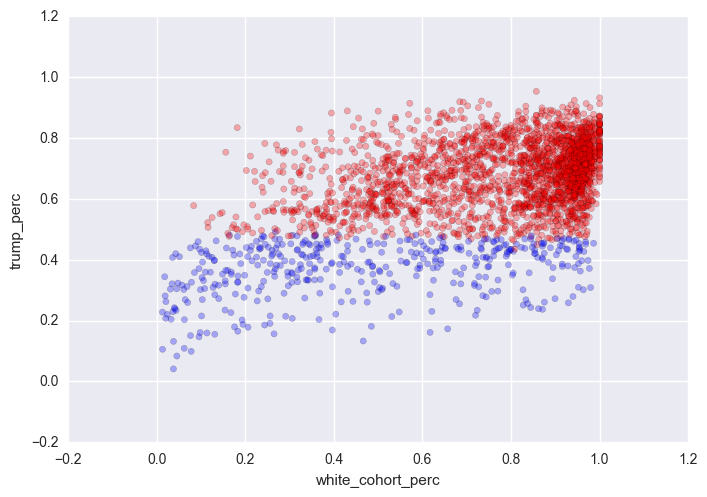

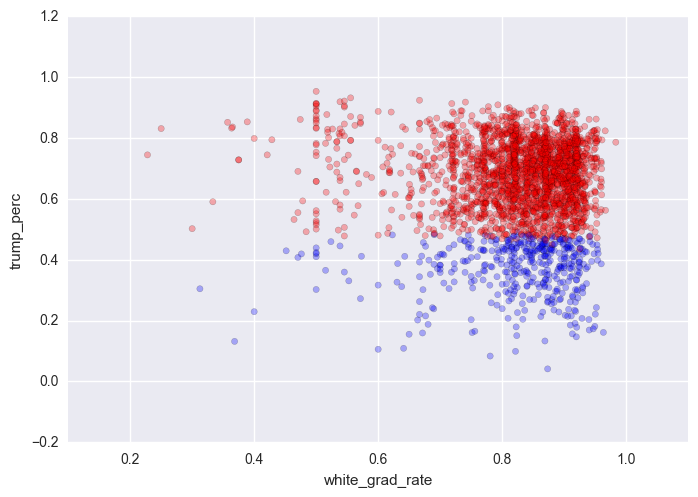

In [186]:
colors = np.where(df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors

#scatter plot - % of cohort is white for county vs % of votes of the county for trump
df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))].plot(x='white_cohort_perc', y='trump_perc', kind='scatter', alpha=0.3, c = colors)
#scatter plot - grad rate of white for county vs % of votes of the county for trump
df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))].plot(x='white_grad_rate', y='trump_perc', kind='scatter', alpha=0.3,c = colors)

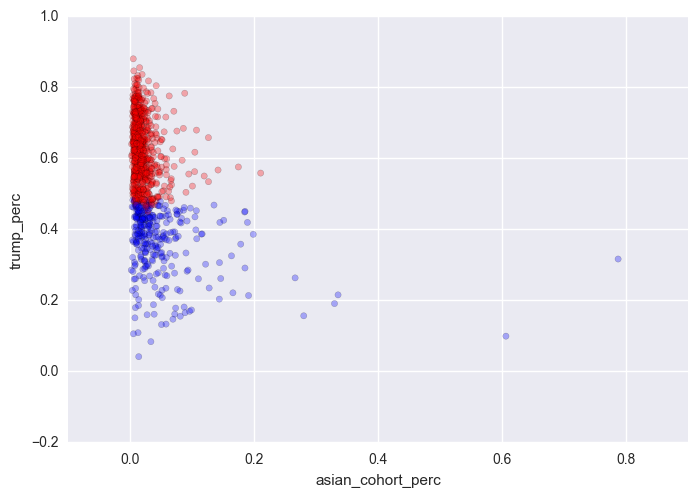

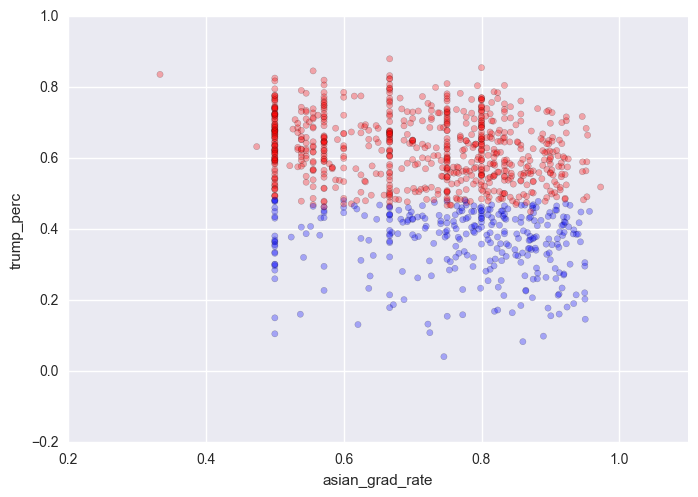

In [187]:
colors = np.where(df1[((df1.asian_grad_rate < 1) & (df1.asian_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors
#scatter plot - % of cohort is asian for county vs % of votes of the county for trump
#scatter plot - grad rate of asian for county vs % of votes of the county for trump
df1[((df1.asian_grad_rate < 1) & (df1.asian_grad_rate > 0))].plot(x='asian_cohort_perc', y='trump_perc', kind='scatter', alpha=0.3, c = colors)
df1[((df1.asian_grad_rate < 1) & (df1.asian_grad_rate > 0))].plot(x='asian_grad_rate', y='trump_perc', kind='scatter', alpha=0.3, c = colors)

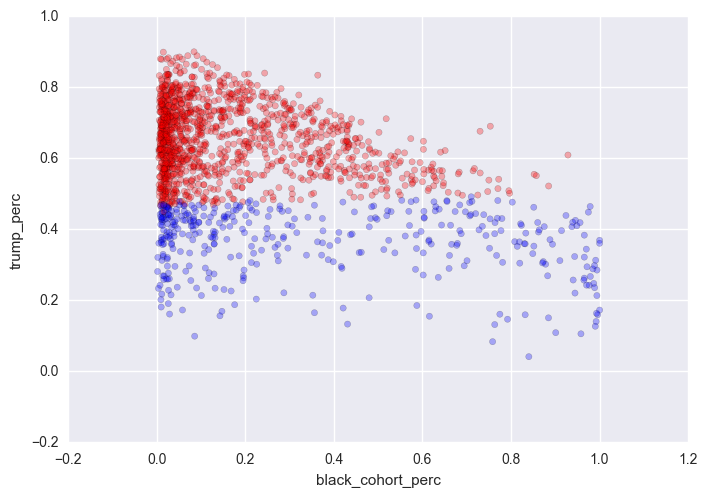

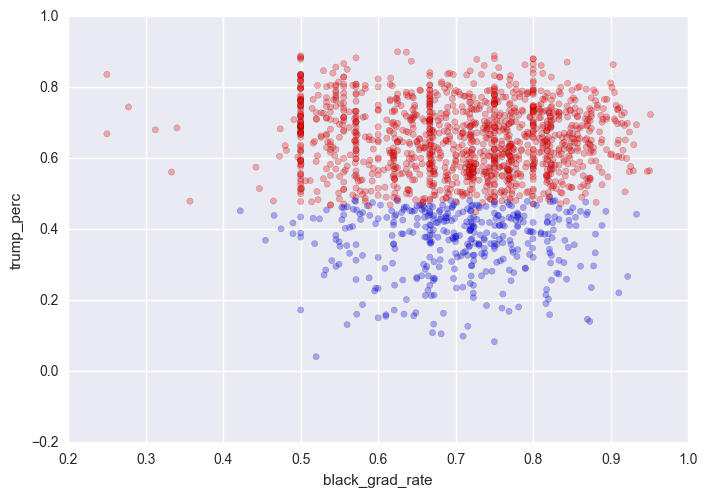

In [189]:
colors = np.where(df1[((df1.black_grad_rate < 1) & (df1.black_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors
#scatter plot - % of cohort is black for county vs % of votes of the county for trump
#scatter plot - grad rate of black for county vs % of votes of the county for trump
df1[((df1.black_grad_rate < 1) & (df1.black_grad_rate > 0))].plot(x='black_cohort_perc', y='trump_perc', kind='scatter', alpha=0.3, c = colors)
df1[((df1.black_grad_rate < 1) & (df1.black_grad_rate > 0))].plot(x='black_grad_rate', y='trump_perc', kind='scatter', alpha=0.3, c = colors)


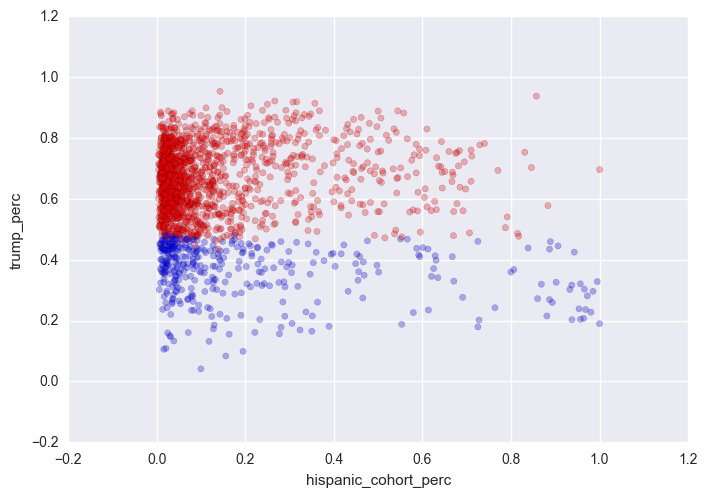

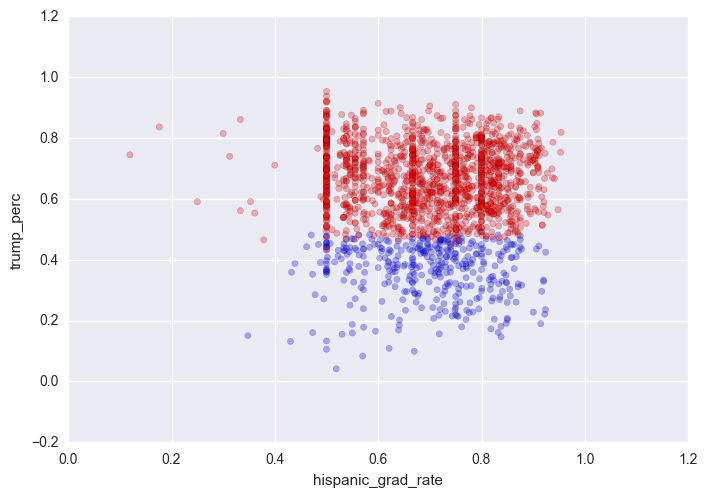

In [191]:
colors = np.where(df1[((df1.hispanic_grad_rate < 1) & (df1.hispanic_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors
#scatter plot - % of cohort is hispanic for county vs % of votes of the county for trump
#scatter plot - grad rate of hispanic for county vs % of votes of the county for trump
df1[((df1.hispanic_grad_rate < 1) & (df1.hispanic_grad_rate > 0))].plot(x='hispanic_cohort_perc', y='trump_perc', kind='scatter', alpha=0.3, c = colors)
df1[((df1.hispanic_grad_rate < 1) & (df1.hispanic_grad_rate > 0))].plot(x='hispanic_grad_rate', y='trump_perc', kind='scatter', alpha=0.3, c = colors)


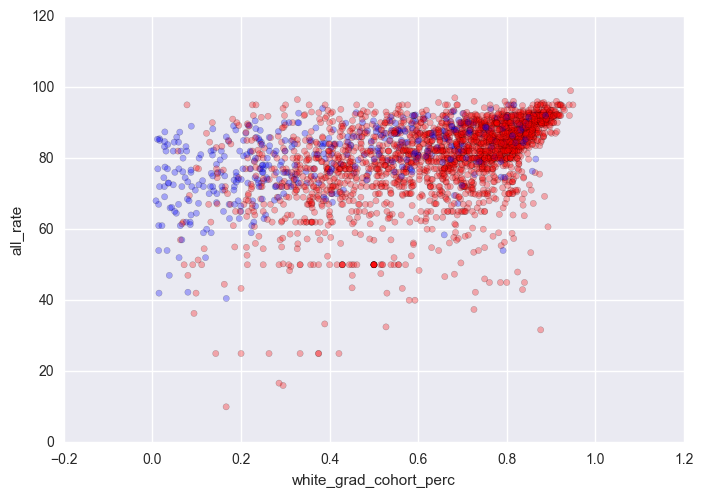

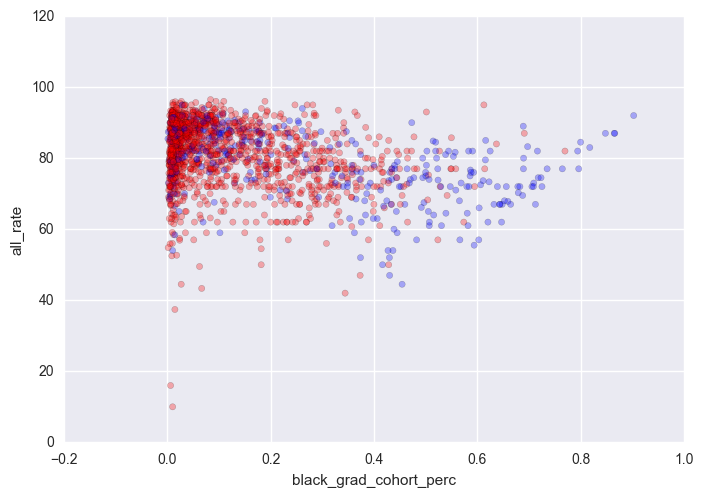

In [207]:
colors = np.where(df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors

df1[((df1.white_grad_rate < 1) & (df1.white_grad_rate > 0))].plot(x='white_grad_cohort_perc', y='all_rate', kind='scatter', alpha=0.3, c = colors)

colors1 = np.where(df1[((df1.black_grad_rate < 1) & (df1.black_grad_rate > 0))]['tag']=='trump', 'r', 'b')
colors1
df1[((df1.black_grad_rate < 1) & (df1.black_grad_rate > 0))].plot(x='black_grad_cohort_perc', y='all_rate', kind='scatter', alpha=0.3, c = colors1)


In [56]:
df1[['tag','tot_vote','st']].groupby(['st','tag']).sum()

tot_vote
st tag              
AL clinton    484235
   trump     1593930
AR clinton    227011
   trump      894673
AZ clinton    412683
   trump     1547370
CA clinton   8062465
   trump      857370
CO clinton   1461254
   trump      940013
CT clinton   1380683
   trump      148134
DC clinton    280272
DE clinton    261468
   trump      180067
FL clinton   4041426
   trump     5345324
GA clinton   2158488
   trump     1869805
HI clinton    285683
IA clinton    615730
   trump      927150
IL clinton   3662175
   trump     1712105
IN clinton    724203
   trump     1993637
KS clinton     95698
   trump     1046420
LA clinton    532734
   trump     1494997
...              ...
NY clinton   2982280
   trump     2196947
OH clinton   2115330
   trump     3210065
OR trump       11638
PA clinton   3172199
   trump     2789373
RI clinton    336415
   trump       74591
SC clinton    502690
   trump     1537706
SD clinton      8901
   trump      357760
TN clinton    584884
   trump     1899807
TX clinton   3989741
   trump     4912156
UT clinton    276220
   trump      525028
VA clinton   1954860
   trump     1830521
VT clinton    284795
   trump        2706
WA clinton   1670720
   trump      500733
WI clinton   1075373
   trump     1869247
WV trump      708226
WY clinton     12176
   trump      236566

[89 rows x 1 columns]

In [199]:
by_state_df = df1[[u'st','clinton_perc','trump_perc',u'tag_1',
          u'asian_cohort_perc',       u'asian_pop_perc',
          u'black_cohort_perc',       u'black_pop_perc',
       u'hispanic_cohort_perc',    u'hispanic_pop_perc',
          u'white_cohort_perc',       u'white_pop_perc']].groupby(['st','tag_1']).mean().reset_index()

In [201]:
#correlation heat map for 
by_state_df.corr()

tag_1  clinton_perc  trump_perc  asian_cohort_perc  \
tag_1                 1.000000     -0.892434    0.902655          -0.211967   
clinton_perc         -0.892434      1.000000   -0.984077           0.210926   
trump_perc            0.902655     -0.984077    1.000000          -0.224128   
asian_cohort_perc    -0.211967      0.210926   -0.224128           1.000000   
asian_pop_perc       -0.219487      0.210541   -0.221392           0.986924   
black_cohort_perc    -0.358062      0.479575   -0.387227          -0.076265   
black_pop_perc       -0.299931      0.460709   -0.373629          -0.088682   
hispanic_cohort_perc -0.172407      0.160260   -0.195035           0.020439   
hispanic_pop_perc    -0.137741      0.135811   -0.162282           0.042252   
white_cohort_perc     0.563798     -0.649650    0.615534          -0.228780   
white_pop_perc        0.447955     -0.568020    0.538321          -0.327152   

                      asian_pop_perc  black_cohort_perc  black_pop_perc  \
tag_1                      -0.219487          -0.358062       -0.299931   
clinton_perc                0.210541           0.479575        0.460709   
trump_perc                 -0.221392          -0.387227       -0.373629   
asian_cohort_perc           0.986924          -0.076265       -0.088682   
asian_pop_perc              1.000000          -0.064944       -0.081612   
black_cohort_perc          -0.064944           1.000000        0.968338   
black_pop_perc             -0.081612           0.968338        1.000000   
hispanic_cohort_perc        0.038756          -0.206464       -0.183853   
hispanic_pop_perc           0.041603          -0.161808       -0.151128   
white_cohort_perc          -0.246343          -0.661415       -0.653813   
white_pop_perc             -0.335193          -0.591185       -0.629323   

                      hispanic_cohort_perc  hispanic_pop_perc  \
tag_1                            -0.172407          -0.137741   
clinton_perc                      0.160260           0.135811   
trump_perc                       -0.195035          -0.162282   
asian_cohort_perc                 0.020439           0.042252   
asian_pop_perc                    0.038756           0.041603   
black_cohort_perc                -0.206464          -0.161808   
black_pop_perc                   -0.183853          -0.151128   
hispanic_cohort_perc              1.000000           0.957645   
hispanic_pop_perc                 0.957645           1.000000   
white_cohort_perc                -0.374364          -0.405141   
white_pop_perc                   -0.358210          -0.418259   

                      white_cohort_perc  white_pop_perc  
tag_1                          0.563798        0.447955  
clinton_perc                  -0.649650       -0.568020  
trump_perc                     0.615534        0.538321  
asian_cohort_perc             -0.228780       -0.327152  
asian_pop_perc                -0.246343       -0.335193  
black_cohort_perc             -0.661415       -0.591185  
black_pop_perc                -0.653813       -0.629323  
hispanic_cohort_perc          -0.374364       -0.358210  
hispanic_pop_perc             -0.405141       -0.418259  
white_cohort_perc              1.000000        0.960866  
white_pop_perc                 0.960866        1.000000

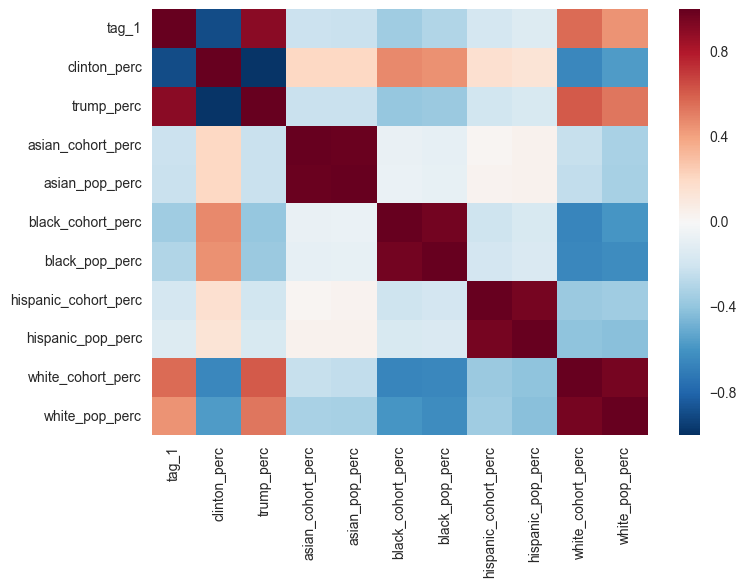

In [202]:
sns.heatmap(by_state_df.corr())

In [203]:
by_pres = df1[['clinton_perc','trump_perc',
          u'asian_cohort_perc',       u'asian_pop_perc','asian_grad_cohort','asian_grad_rate',
          u'black_cohort_perc',       u'black_pop_perc','black_grad_cohort','black_grad_rate',
       u'hispanic_cohort_perc',    u'hispanic_pop_perc','hispanic_grad_cohort','hispanic_grad_rate',
          u'white_cohort_perc',       u'white_pop_perc','white_grad_cohort','white_grad_rate']]

In [204]:
by_pres.corr()

clinton_perc  trump_perc  asian_cohort_perc  \
clinton_perc              1.000000   -0.985503           0.330131   
trump_perc               -0.985503    1.000000          -0.344096   
asian_cohort_perc         0.330131   -0.344096           1.000000   
asian_pop_perc            0.335715   -0.341617           0.853651   
asian_grad_cohort         0.215559   -0.216498           0.623694   
asian_grad_rate           0.145649   -0.165277           0.272266   
black_cohort_perc         0.511786   -0.431235          -0.019190   
black_pop_perc            0.442445   -0.367801          -0.040806   
black_grad_cohort         0.358606   -0.340671           0.235686   
black_grad_rate           0.160471   -0.146709           0.082968   
hispanic_cohort_perc      0.158471   -0.164955           0.118881   
hispanic_pop_perc         0.165554   -0.167224           0.114251   
hispanic_grad_cohort      0.189436   -0.188501           0.229111   
hispanic_grad_rate       -0.009194   -0.009222           0.096748   
white_cohort_perc        -0.600432    0.547113          -0.179329   
white_pop_perc           -0.503372    0.456244          -0.150499   
white_grad_cohort         0.316434   -0.327177           0.393149   
white_grad_rate          -0.102275    0.077595           0.124859   

                      asian_pop_perc  asian_grad_cohort  asian_grad_rate  \
clinton_perc                0.335715           0.215559         0.145649   
trump_perc                 -0.341617          -0.216498        -0.165277   
asian_cohort_perc           0.853651           0.623694         0.272266   
asian_pop_perc              1.000000           0.645785         0.152818   
asian_grad_cohort           0.645785           1.000000         0.089582   
asian_grad_rate             0.152818           0.089582         1.000000   
black_cohort_perc           0.034824           0.003851        -0.127693   
black_pop_perc              0.005072          -0.007798        -0.126089   
black_grad_cohort           0.271920           0.433066         0.119707   
black_grad_rate             0.074822           0.036690         0.256376   
hispanic_cohort_perc        0.109810           0.127859         0.034139   
hispanic_pop_perc           0.109044           0.116136         0.024786   
hispanic_grad_cohort        0.274754           0.747593         0.083349   
hispanic_grad_rate          0.061628           0.036606         0.338517   
white_cohort_perc          -0.198023          -0.157505         0.057736   
white_pop_perc             -0.186456          -0.148325         0.063626   
white_grad_cohort           0.379167           0.556961         0.234158   
white_grad_rate             0.092398           0.061660         0.309574   

                      black_cohort_perc  black_pop_perc  black_grad_cohort  \
clinton_perc                   0.511786        0.442445           0.358606   
trump_perc                    -0.431235       -0.367801          -0.340671   
asian_cohort_perc             -0.019190       -0.040806           0.235686   
asian_pop_perc                 0.034824        0.005072           0.271920   
asian_grad_cohort              0.003851       -0.007798           0.433066   
asian_grad_rate               -0.127693       -0.126089           0.119707   
black_cohort_perc              1.000000        0.881387           0.260623   
black_pop_perc                 0.881387        1.000000           0.197435   
black_grad_cohort              0.260623        0.197435           1.000000   
black_grad_rate                0.140924        0.114022           0.055902   
hispanic_cohort_perc          -0.158972       -0.143593           0.079663   
hispanic_pop_perc             -0.127182       -0.105972           0.072312   
hispanic_grad_cohort          -0.004780       -0.012082           0.533095   
hispanic_grad_rate            -0.232199       -0.199210           0.020255   
white_cohort_perc             -0.693308       -0.608267          -0.285755   
white_pop_perc   

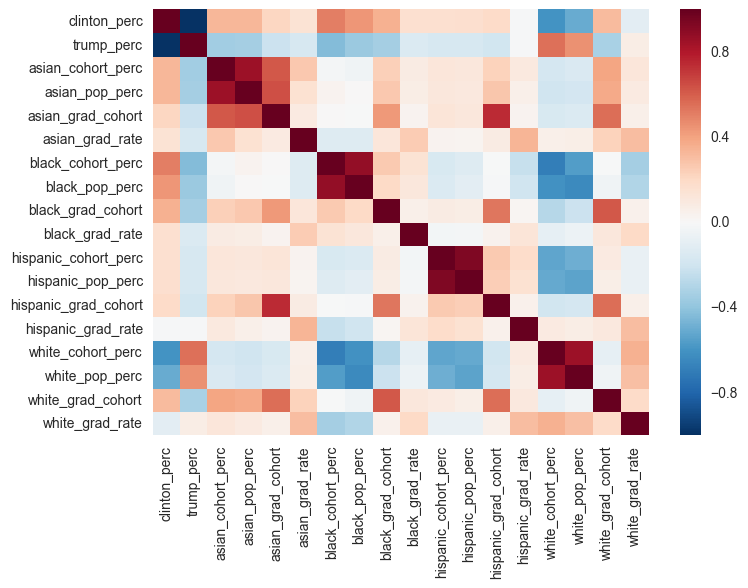

In [205]:
sns.heatmap(by_pres.corr())

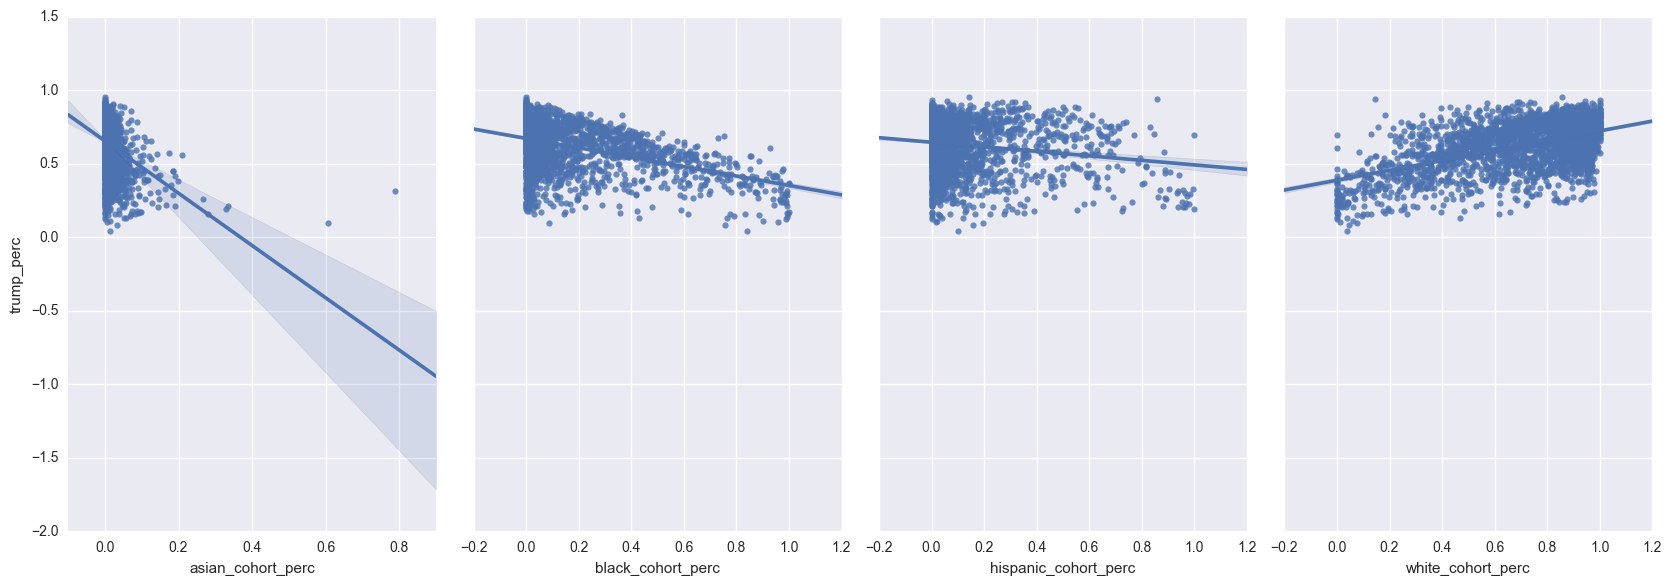

In [214]:
#pairplot w/ regression
sns.pairplot(df1, x_vars=[
                          u'asian_cohort_perc',
                          u'black_cohort_perc',
                          u'hispanic_cohort_perc',
                          u'white_cohort_perc'], y_vars='trump_perc', size=6, aspect=.7,kind='reg')

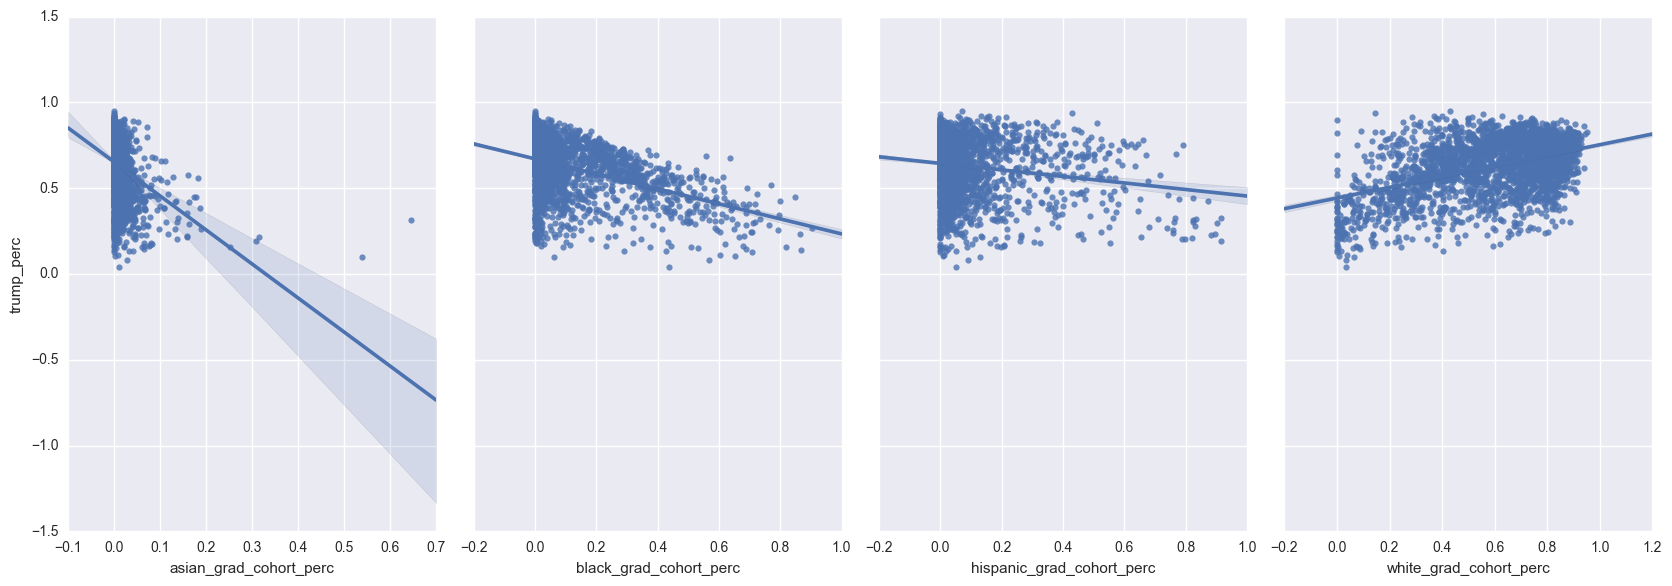

In [216]:
sns.pairplot(df1, x_vars=[
                          u'asian_grad_cohort_perc',
                          u'black_grad_cohort_perc',
                          u'hispanic_grad_cohort_perc',
                          u'white_grad_cohort_perc'], y_vars='trump_perc', size=6, aspect=0.7,kind='reg')

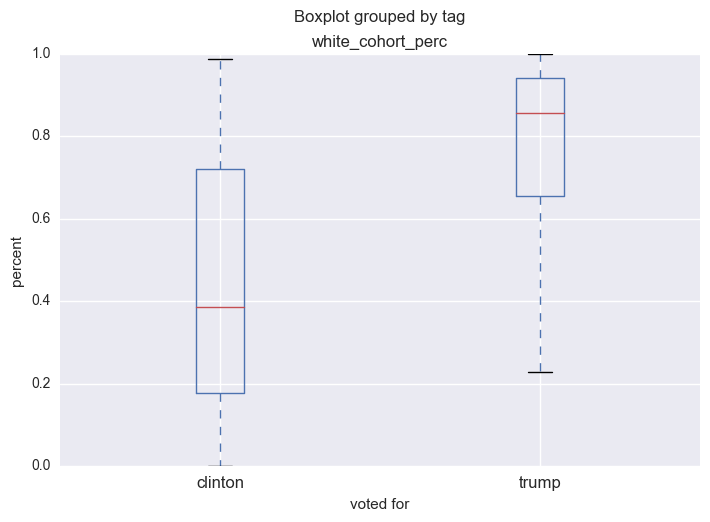

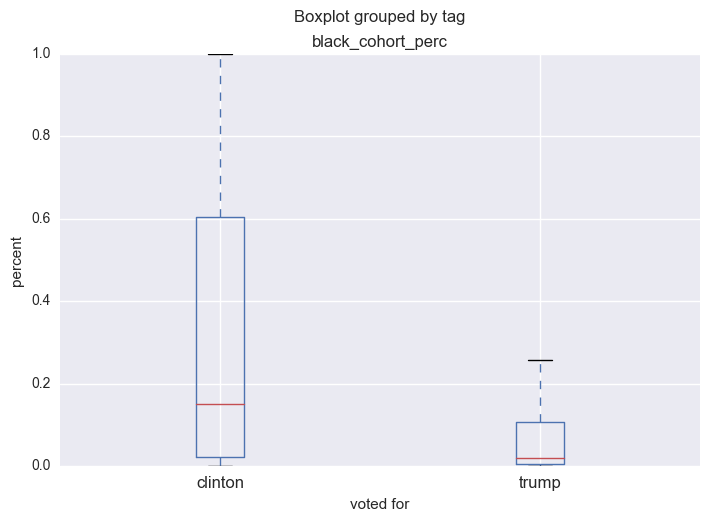

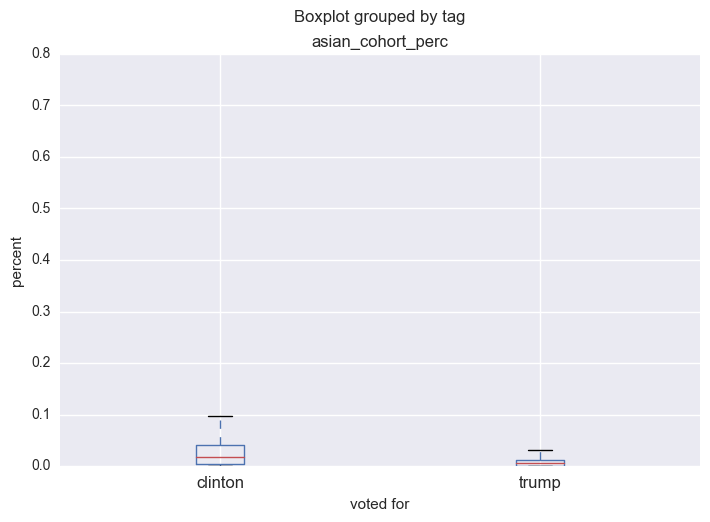

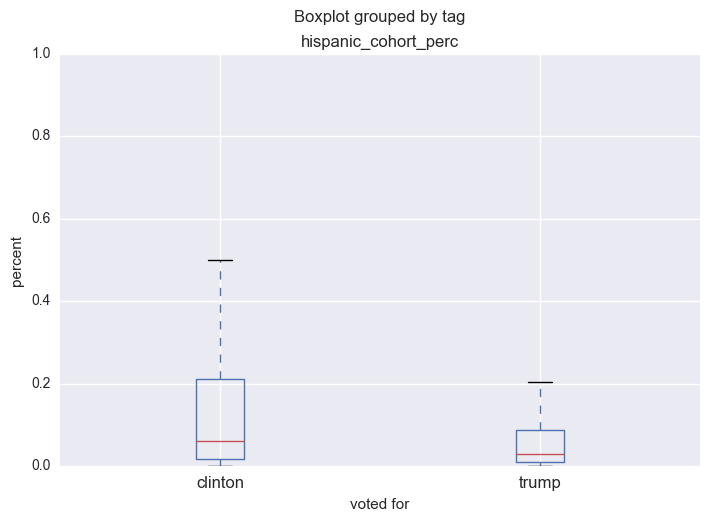

In [71]:
#boxplots for the scatters above
df1.boxplot(column='white_cohort_perc', by='tag')
plt.xlabel('voted for')
plt.ylabel('percent')

df1.boxplot(column='black_cohort_perc', by='tag')
plt.xlabel('voted for')
plt.ylabel('percent')

df1.boxplot(column='asian_cohort_perc', by='tag')
plt.xlabel('voted for')
plt.ylabel('percent')

df1.boxplot(column='hispanic_cohort_perc', by='tag')
plt.xlabel('voted for')
plt.ylabel('percent')

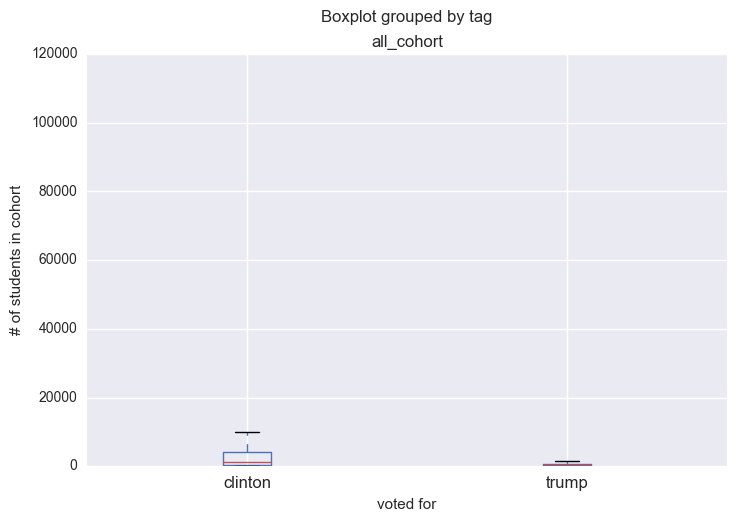

In [218]:
df1.boxplot(column='all_cohort', by='tag')
plt.xlabel('voted for')
plt.ylabel('# of students in cohort')

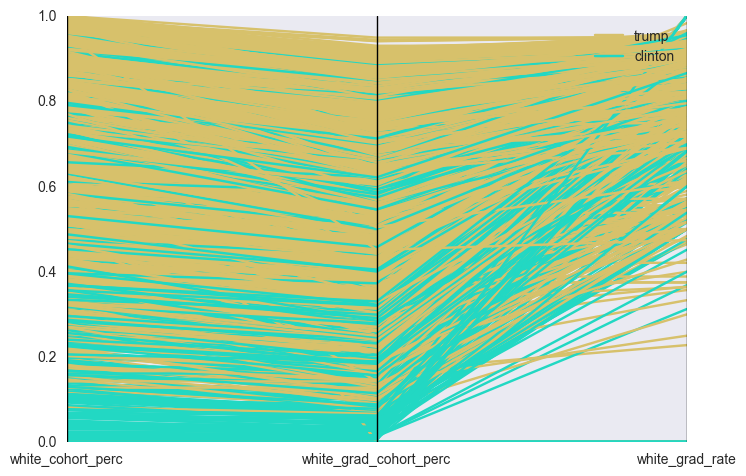

In [73]:
#parallel coords (not very pretty in this case)
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df1[['tag','white_cohort_perc','white_grad_cohort_perc','white_grad_rate']], 'tag')

In [13]:
# create X (features) and y (response)
X, y = df1[['white_grad_cohort_perc','black_grad_cohort_perc','hispanic_grad_cohort_perc']], df1['tag'] #recall axis 1 means columns

print X.shape
print y.shape

NameError: name 'df1' is not defined

In [75]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.9104850213980028

In [76]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.99928673323823114,
 0.90763195435092725,
 0.9104850213980028,
 0.89550641940085596,
 0.90014265335235377,
 0.891583452211127,
 0.89194008559201143,
 0.88516405135520682,
 0.88587731811697579,
 0.88338088445078455,
 0.8905135520684736,
 0.88623395149786022,
 0.88908701854493577,
 0.88801711840228248,
 0.88623395149786022,
 0.88587731811697579,
 0.88409415121255353,
 0.88373751783166909,
 0.88302425106990012,
 0.88088445078459343,
 0.880527817403709,
 0.87910128388017117,
 0.8794579172610556,
 0.88088445078459343,
 0.87910128388017117,
 0.880527817403709,
 0.87874465049928674,
 0.88088445078459343,
 0.88017118402282457]

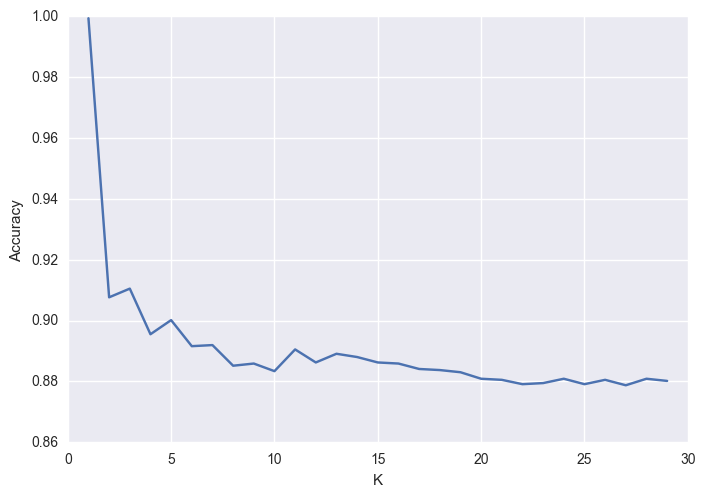

In [77]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [78]:
#cross-val knn
features = df1[['white_grad_cohort_perc','black_grad_cohort_perc','hispanic_grad_cohort_perc']]
response = df1['tag_1']

# step 1: split data into training set and test set
features_train, features_test, response_train, response_test \
= train_test_split(features, response, random_state=4)
# the random_state allows us all to get the same random numbers

In [79]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(features_train, response_train)
knn.score(features_test, response_test)

0.86447931526390875

In [80]:
X = df1[['white_grad_cohort_perc','black_grad_cohort_perc','asian_grad_cohort','hispanic_grad_cohort','all_rate']]
y = df1['tag_1']

In [81]:
from sklearn.cross_validation import cross_val_score

k_range = range(1, 30, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy')))
scores


[0.81526394511217626,
 0.84058164255673162,
 0.84771941581550114,
 0.85983683767910279,
 0.858409546283735,
 0.85912446635075901,
 0.8609019181920583,
 0.85912192440871527,
 0.86161747714291148,
 0.86197525661833807,
 0.8623292209151534,
 0.86197398791286162,
 0.86375651910715767,
 0.86304731727695927,
 0.86268636377229646]

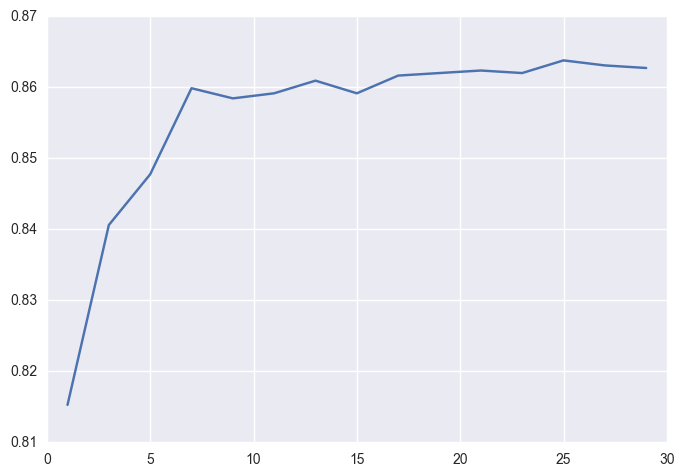

In [82]:
plt.figure()
plt.plot(k_range, scores)

In [83]:
#grid search for cv knn
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [84]:
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]

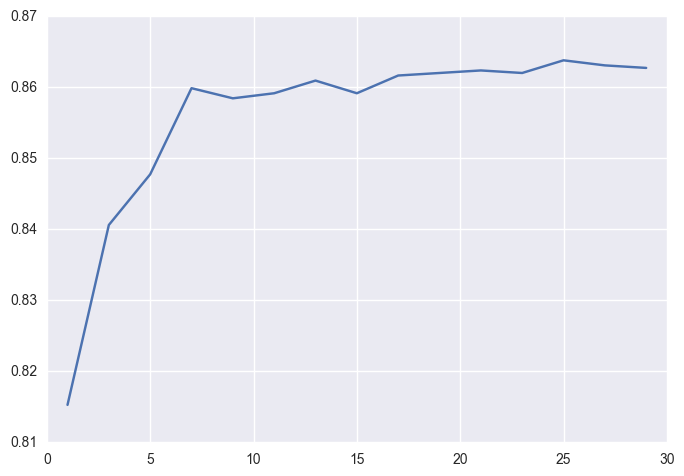

In [85]:
plt.figure()
plt.plot(k_range, grid_mean_scores)

In [86]:
grid.best_score_

0.86376604850213978

In [87]:
grid.best_params_

{'n_neighbors': 25}

In [88]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [95]:
df1.columns

Index([               u'CountyFips',                        u'st',
                           u'state',                u'all_cohort',
                    u'asian_cohort',              u'black_cohort',
                 u'hispanic_cohort',              u'white_cohort',
               u'asian_grad_cohort',         u'black_grad_cohort',
            u'hispanic_grad_cohort',         u'white_grad_cohort',
                         u'tot_pop',                  u'male_pop',
                      u'female_pop',              u'hispanic_pop',
                       u'white_pop',                 u'black_pop',
                      u'native_pop',                 u'asian_pop',
                      u'asian_rate',                u'black_rate',
                   u'hispanic_rate',                u'white_rate',
                        u'all_rate',                   u'clinton',
                           u'trump',                  u'tot_vote',
                             u'tag',                     u'tag

In [93]:
# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

In [108]:
feature_cols = ['white_grad_cohort_perc','black_grad_cohort_perc','male_pop','female_pop','black_grad_rate']
X = df1[feature_cols]
cross_val_rmse(X, y)

0.3127817303184473

In [136]:
y

0       1
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2774    1
2775    1
2776    1
2777    1
2778    1
2779    1
2780    1
2781    1
2782    1
2783    1
2784    1
2785    1
2786    1
2787    1
2788    1
2789    1
2790    1
2791    1
2792    1
2793    1
2794    1
2795    1
2796    1
2797    1
2798    1
2799    1
2800    0
2801    1
2802    1
2803    1
Name: tag_1, dtype: int64

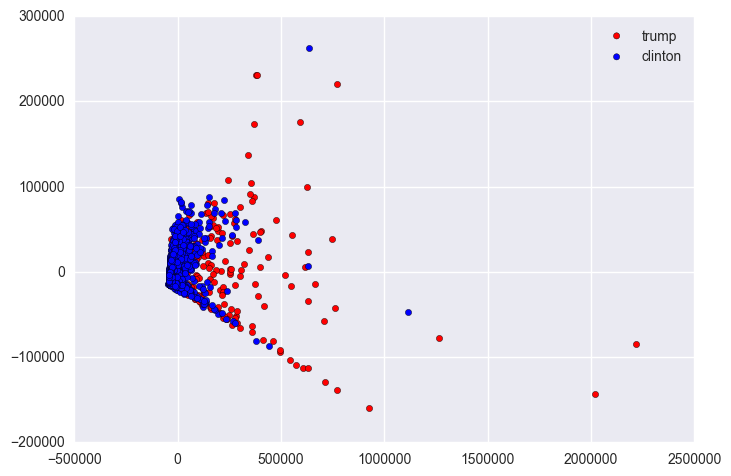

In [164]:
#PCA

pca = decomposition.PCA(n_components=5)
X_r = pca.fit_transform(X)
y = np.array(df1['tag_1'])
target_names = ['trump','clinton']
X = df1[[u'all_cohort',
                    u'asian_cohort',              u'black_cohort',
                 u'hispanic_cohort',              u'white_cohort',
               u'asian_grad_cohort',         u'black_grad_cohort',
            u'hispanic_grad_cohort',         u'white_grad_cohort',
                         u'tot_pop',                  u'male_pop',
                      u'female_pop',              u'hispanic_pop',
                       u'white_pop',                 u'black_pop',
                      u'native_pop',                 u'asian_pop',
                      u'asian_rate',                u'black_rate',
                   u'hispanic_rate',                u'white_rate',
                        u'all_rate',                  u'tot_vote',
               u'asian_cohort_perc',            u'asian_pop_perc',
                 u'asian_grad_rate',    u'asian_grad_cohort_perc',
               u'black_cohort_perc',            u'black_pop_perc',
                 u'black_grad_rate',    u'black_grad_cohort_perc',
            u'hispanic_cohort_perc',         u'hispanic_pop_perc',
              u'hispanic_grad_rate', u'hispanic_grad_cohort_perc',
               u'white_cohort_perc',            u'white_pop_perc',
                 u'white_grad_rate',    u'white_grad_cohort_perc']]


plt.figure()
for c, i, target_name in zip("rb", [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()

In [165]:
#knn on the pca transformed dataset
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_r, y, cv=10, scoring='accuracy').mean()

0.85980723606168452

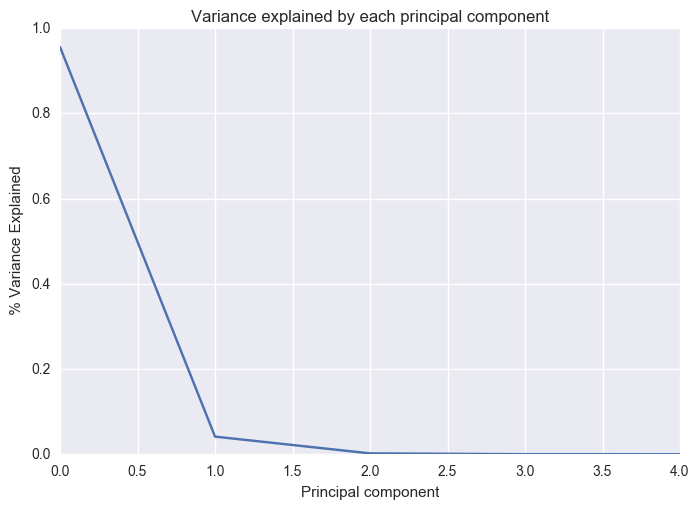

In [166]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')